<a href="https://colab.research.google.com/github/souravkarma/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Stock_Analysis_Using_Yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Plan is to use 44 moving average techniques to find the stock which is going to up in next week

#Step 1: Install the yfinance library.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!pip install yfinance

In [3]:
import yfinance as yf
data = yf.download(["ITC.NS"], start="2022-01-01", end="2024-03-10",interval='1D')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,218.050003,219.850006,217.050003,219.100006,201.769958,7765495
2022-01-04,219.500000,221.699997,219.050003,220.250000,202.828995,9050253
2022-01-05,219.649994,221.500000,218.649994,220.550003,203.105270,11230588
2022-01-06,219.000000,220.399994,218.199997,218.699997,201.401581,8950589
2022-01-07,219.800003,220.649994,217.500000,218.399994,201.125290,8855041
...,...,...,...,...,...,...
2024-03-01,408.899994,413.149994,407.500000,409.500000,409.500000,12395632
2024-03-04,412.250000,412.950012,408.450012,409.100006,409.100006,6840352
2024-03-05,409.649994,411.399994,403.950012,406.149994,406.149994,9733507


In [4]:
data=data.reset_index()
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,218.050003,219.850006,217.050003,219.100006,201.769958,7765495
1,2022-01-04,219.500000,221.699997,219.050003,220.250000,202.828995,9050253
2,2022-01-05,219.649994,221.500000,218.649994,220.550003,203.105270,11230588
3,2022-01-06,219.000000,220.399994,218.199997,218.699997,201.401581,8950589
4,2022-01-07,219.800003,220.649994,217.500000,218.399994,201.125290,8855041
...,...,...,...,...,...,...,...
535,2024-03-01,408.899994,413.149994,407.500000,409.500000,409.500000,12395632
536,2024-03-04,412.250000,412.950012,408.450012,409.100006,409.100006,6840352
537,2024-03-05,409.649994,411.399994,403.950012,406.149994,406.149994,9733507
538,2024-03-06,406.500000,409.950012,400.700012,407.850006,407.850006,11106855


In [5]:
data['Open'].mode(),data['High'].mode(),data['Low'].mode(),data['Close'].mode()

(0    445.0
 Name: Open, dtype: float64,
 0    275.000000
 1    341.000000
 2    438.000000
 3    444.500000
 4    455.899994
 Name: High, dtype: float64,
 0    329.100006
 1    331.299988
 2    438.299988
 3    447.000000
 4    449.299988
 Name: Low, dtype: float64,
 0    375.549988
 1    439.700012
 Name: Close, dtype: float64)

In [6]:
sorted(data['Close'].mode(),reverse=True)
sorted(data['Open'].mode(),reverse=True)
sorted(data['Low'].mode(),reverse=True)

[449.29998779296875,
 447.0,
 438.29998779296875,
 331.29998779296875,
 329.1000061035156]

[*********************100%%**********************]  1 of 1 completed


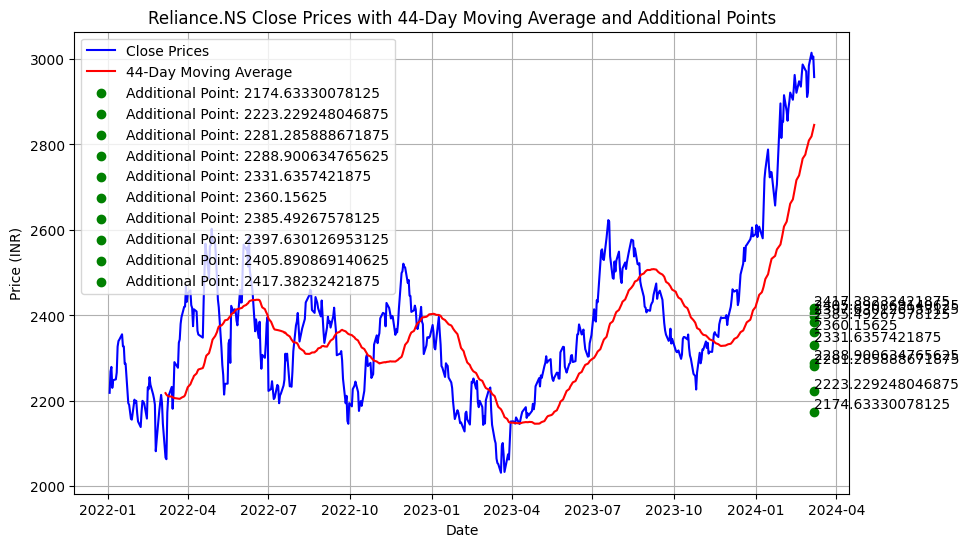

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def find_value(x):
    # Download data
    data = yf.download(x, start="2022-01-01", end="2024-03-10", interval='1D')

    # Calculate 44-day moving average
    data['44_MA'] = data['Close'].rolling(window=44).mean()

    # Additional points to plot
    points = list(data['Close'].mode())

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Close Prices', color='blue')
    plt.plot(data.index, data['44_MA'], label='44-Day Moving Average', color='red')

    # Plotting additional points
    for point in points:
        plt.scatter(data.index[-1], point, label=f'Additional Point: {point}', color='green')
        plt.text(data.index[-1], point, f'{point}', fontsize=10, verticalalignment='bottom')

    # Adding labels and title
    plt.title(f'{x} Close Prices with 44-Day Moving Average and Additional Points')
    plt.xlabel('Date')
    plt.ylabel('Price (INR)')
    plt.legend()
    plt.grid(True)
    plt.show()

find_value('Reliance.NS')


IF price is more than above point then stock is overvalued

#Detailed Analysis of price

[*********************100%%**********************]  1 of 1 completed


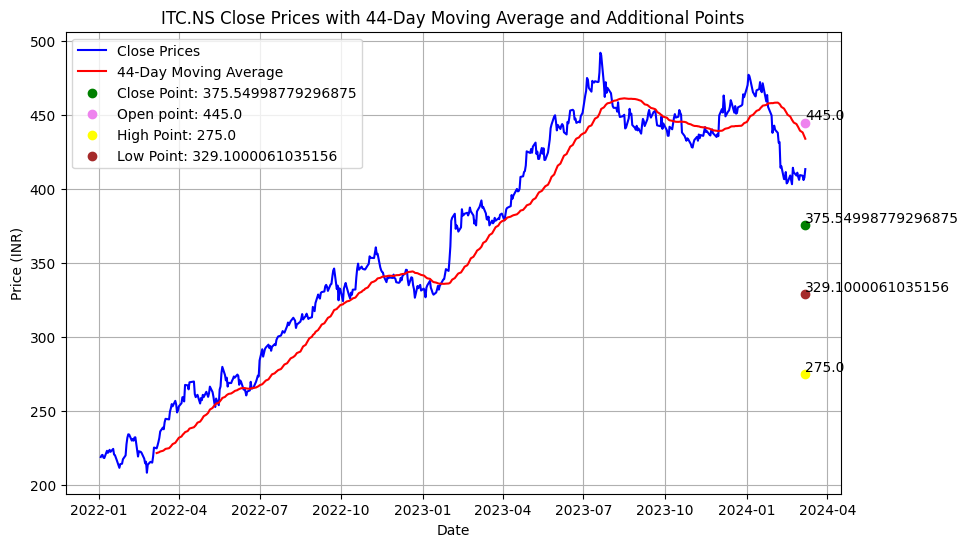

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def find_overall(x):
    # Download data
    data = yf.download(x, start="2022-01-01", end="2024-03-10", interval='1D')

    # Calculate 44-day moving average
    data['44_MA'] = data['Close'].rolling(window=44).mean()

    # Additional points to plot
    points1 = list(data['Close'].mode())[:1]
    points2 = list(data['Open'].mode())[:1]
    points3 = list(data['High'].mode())[:1]
    points4 = list(data['Low'].mode())[:1]


    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Close Prices', color='blue')
    plt.plot(data.index, data['44_MA'], label='44-Day Moving Average', color='red')

    # Plotting additional points
    for point in points1:
        plt.scatter(data.index[-1], point, label=f'Close Point: {point}', color='green')
        plt.text(data.index[-1], point, f'{point}', fontsize=10, verticalalignment='bottom')

    # Plotting additional points
    for point in points2:
        plt.scatter(data.index[-1], point, label=f'Open point: {point}', color='violet')
        plt.text(data.index[-1], point, f'{point}', fontsize=10, verticalalignment='bottom')

    # Plotting additional points
    for point in points3:
        plt.scatter(data.index[-1], point, label=f'High Point: {point}', color='yellow')
        plt.text(data.index[-1], point, f'{point}', fontsize=10, verticalalignment='bottom')

    # Plotting additional points
    for point in points4:
        plt.scatter(data.index[-1], point, label=f'Low Point: {point}', color='brown')
        plt.text(data.index[-1], point, f'{point}', fontsize=10, verticalalignment='bottom')

    # Adding labels and title
    plt.title(f'{x} Close Prices with 44-Day Moving Average and Additional Points')
    plt.xlabel('Date')
    plt.ylabel('Price (INR)')
    plt.legend()
    plt.grid(True)
    plt.show()

find_overall('ITC.NS')


#Now last 6 months chart for swing trading

[*********************100%%**********************]  1 of 1 completed


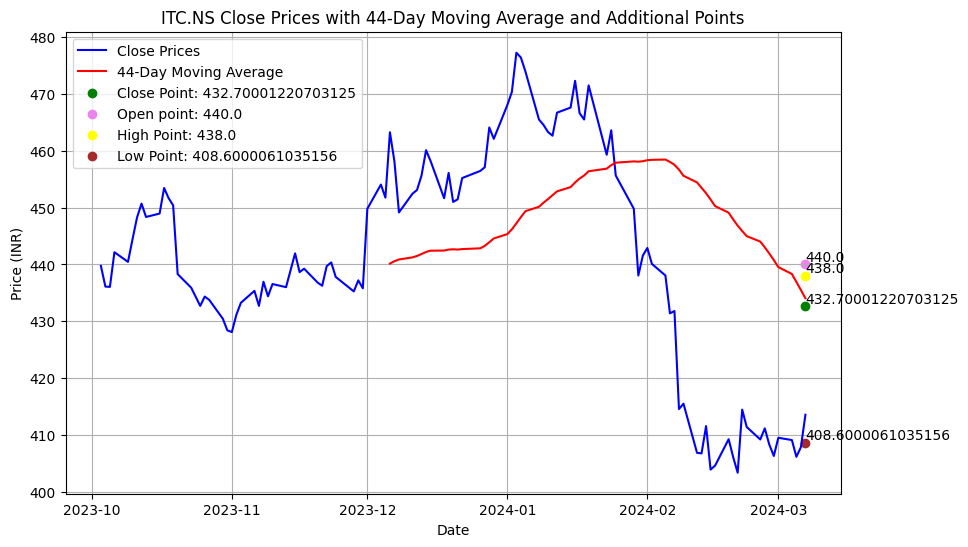

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def swing_overall(x):
    # Download data
    data = yf.download(x, start="2023-10-01", end="2024-03-10", interval='1D')

    # Calculate 44-day moving average
    data['44_MA'] = data['Close'].rolling(window=44).mean()

    # Additional points to plot
    points1 = list(data['Close'].mode())[:1]
    points2 = list(data['Open'].mode())[:1]
    points3 = list(data['High'].mode())[:1]
    points4 = list(data['Low'].mode())[:1]


    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Close Prices', color='blue')
    plt.plot(data.index, data['44_MA'], label='44-Day Moving Average', color='red')

    # Plotting additional points
    for point in points1:
        plt.scatter(data.index[-1], point, label=f'Close Point: {point}', color='green')
        plt.text(data.index[-1], point, f'{point}', fontsize=10, verticalalignment='bottom')

    # Plotting additional points
    for point in points2:
        plt.scatter(data.index[-1], point, label=f'Open point: {point}', color='violet')
        plt.text(data.index[-1], point, f'{point}', fontsize=10, verticalalignment='bottom')

    # Plotting additional points
    for point in points3:
        plt.scatter(data.index[-1], point, label=f'High Point: {point}', color='yellow')
        plt.text(data.index[-1], point, f'{point}', fontsize=10, verticalalignment='bottom')

    # Plotting additional points
    for point in points4:
        plt.scatter(data.index[-1], point, label=f'Low Point: {point}', color='brown')
        plt.text(data.index[-1], point, f'{point}', fontsize=10, verticalalignment='bottom')

    # Adding labels and title
    plt.title(f'{x} Close Prices with 44-Day Moving Average and Additional Points')
    plt.xlabel('Date')
    plt.ylabel('Price (INR)')
    plt.legend()
    plt.grid(True)
    plt.show()

swing_overall('ITC.NS')


[*********************100%%**********************]  1 of 1 completed


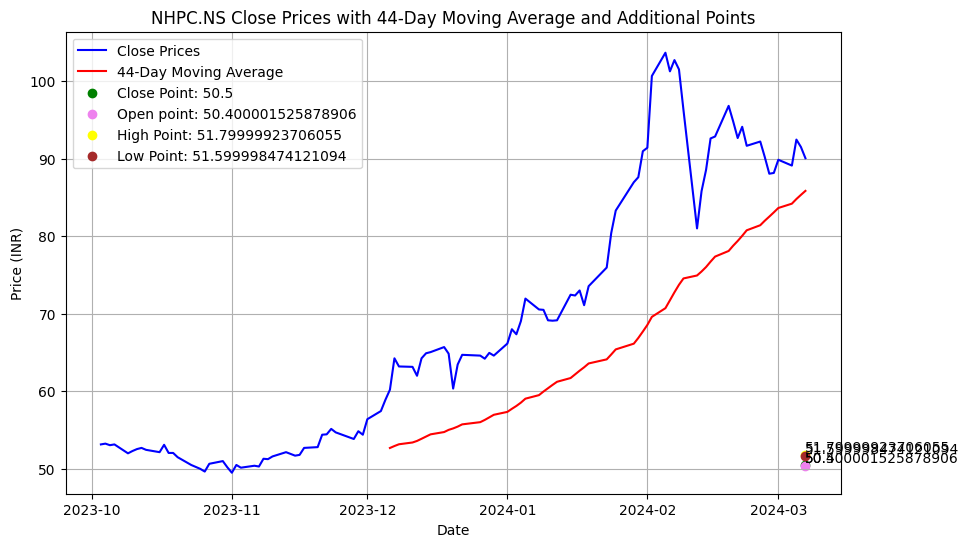

In [10]:
swing_overall('NHPC.NS')

In [11]:
max(data['High'][3:6])

224.6999969482422

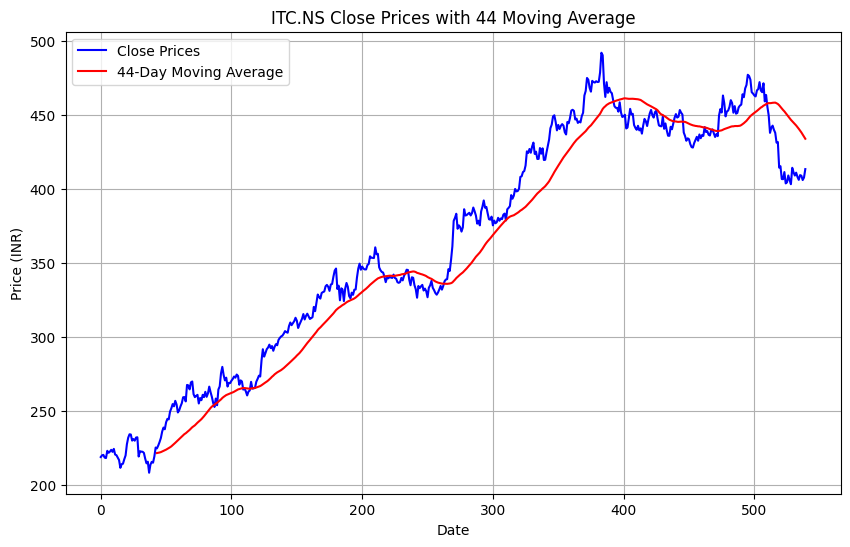

In [12]:
data['44MA']=data['Close'].rolling(window=44).mean()

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Close Prices', color='blue')
plt.plot(data.index, data['44MA'], label='44-Day Moving Average', color='red')

# Adding labels and title
plt.title('ITC.NS Close Prices with 44 Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
!pip install plotly_calplot

In [23]:
daily_close

Date
2022-01-03    219.100006
2022-01-04    220.250000
2022-01-05    220.550003
2022-01-06    218.699997
2022-01-07    218.399994
                 ...    
2024-03-01    409.500000
2024-03-04    409.100006
2024-03-05    406.149994
2024-03-06    407.850006
2024-03-07    413.549988
Name: Close, Length: 540, dtype: float64

Here's what each part of the plot represents:

 * Calendar Grid: Each cell in the calendar grid represents a day in the year.
 * Color Intensity: The color intensity of each cell corresponds to the average close price for that particular day. Typically, higher close prices are represented by darker colors, while lower close prices are represented by lighter colors.

In [61]:
import yfinance as yf
import pandas as pd
from plotly_calplot import calplot
import plotly.graph_objects as go

def cal_map(x):
  # Download data
  data = yf.download(x, start="2022-01-01", end="2024-03-10", interval='1D')

  # Calculate daily mean close prices
  daily_close = data['Close']
  # Create a DataFrame with the required format
  df = pd.DataFrame({'date': daily_close.index, 'value': daily_close.values})

  # Create a calendar heatmap with calplot
  fig = calplot(df, x="date", y="value")

  # Update layout
  fig.update_layout(
    title="<b style='color:black'>ITC.NS Calendar Heatmap of Close Prices</b>",
    xaxis_title="Date",
    yaxis_title="Close Price",
    template="plotly_white"
    )

  # Show plot
  fig.show()

cal_map('ITC.NS')


[*********************100%%**********************]  1 of 1 completed


#BUBBLE CHART

In [76]:
import yfinance as yf
import plotly.express as px

def bubble_chart(x):
  # Download data
  data = yf.download(x, start="2022-01-01", end="2024-03-10", interval='1D')

  # Reset index
  data.reset_index(inplace=True)

  # Extract year from the Date column
  data['Year'] = data['Date'].dt.year
  data['Day']=data['Date'].dt.day
  data['Month']=data['Date'].dt.month

  # Create a bubble plot
  fig = px.scatter(data, x='Date', y='Close', size='Volume', color='Year',
                 title="Bubble Plot of Close Price",
                 labels={'Date': 'Date', 'Close': 'Close Price', 'Volume': 'Volume', 'Year': 'Year'},
                 hover_name='Date')

  # Update layout
  fig.update_layout(template='plotly_white')

  # Show plot
  fig.show()

bubble_chart('ITC.NS')

[*********************100%%**********************]  1 of 1 completed
